In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
from nsepy import get_history as gh
import googlefinance as gfc
plt.style.use('fivethirtyeight')
import plotly.graph_objs as go
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import yfinance as yf

Defining the companies and other parameters

In [2]:
stocksymbols=['BBCA.JK', 'BBRI.JK', 'BMRI.JK', 'BBNI.JK', 'BDMN.JK', 'MAYA.JK']
start_date = date(2017,10,14)
end_date = date.today()
print(end_date)
print(f"You have {len(stocksymbols)} assets in your porfolio" )

2022-10-25
You have 6 assets in your porfolio


## Fething the Data

In [3]:
data=yf.download(stocksymbols, start_date, end_date)['Adj Close']

[*********************100%***********************]  6 of 6 completed


Principles:
1. Maximize return for a given level of risk.
2. Minimize risk for a given level of return.

## Analysis 

Plotting the adjusted close price as the closing price has been adjusted to reflect the stock's value after taking account any corporate actions.

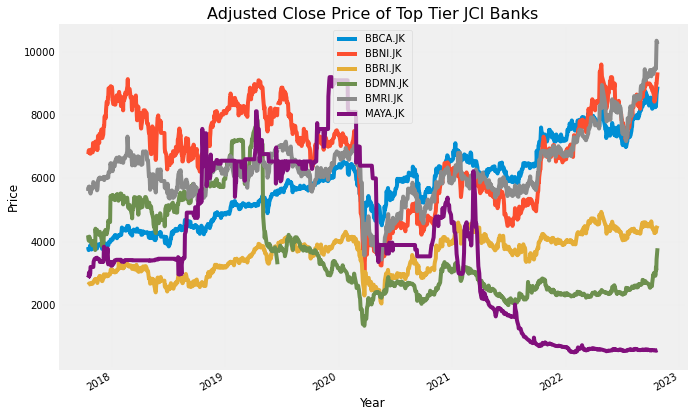

In [4]:
data.plot(figsize=(10,7))
plt.legend()
plt.title("Adjusted Close Price of Top Tier JCI Banks", fontsize=16)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.01)
plt.show()

In terms of asset, the biggest bank in Indonesia as follows:
1. BMRI
2. BMRI
3. BBCA
4. BBNI
.....

It is interesting to note here that the highest to lowest adjusted stock price of the banks:
1. BMRI
2. BBNI
3. BBCA
4. BBRI
....

### Correlation Matrix

Correlation matrix to see the relationship amongst banks

In [5]:
correlation_matrix=data.corr(method='pearson')
correlation_matrix

,BBCA.JK,BBNI.JK,BBRI.JK,BDMN.JK,BMRI.JK,MAYA.JK
BBCA.JK,1.000000,0.058245,0.858322,-0.649395,0.609952,-0.483780
BBNI.JK,0.058245,1.000000,0.326295,0.524287,0.762321,0.041710
BBRI.JK,0.858322,0.326295,1.000000,-0.419952,0.715674,-0.273486
BDMN.JK,-0.649395,0.524287,-0.419952,1.000000,-0.043166,0.456150
BMRI.JK,0.609952,0.762321,0.715674,-0.043166,1.000000,-0.345539
MAYA.JK,-0.483780,0.041710,-0.273486,0.456150,-0.345539,1.000000


Correlation between Stocks in our portfolio


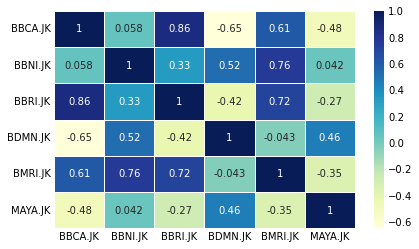

In [6]:
fig2=plt.figure()
sb.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)
print('Correlation between Stocks in our portfolio')
plt.show(fig2)

The financial system is similar to a web, meaning that institutions depend on each other. If a bank goes bankrupt, the whole financial system will panic. Thus, the government inject a bank when there is a problem.

From the above, I guess BBCA and BBRI obtain the highest correlation. Maybe, both banks have intense transactions. According to news, both banks are approaching Alipay. BBRI targets SME's while BBCA targets large corporations. 

Bank Maya has a negative relationship with other banks, so does BDMN. This is interesting, I need to dig deep into their annual report as to why these two banks have negative correlations with the other 4. But maybe they could be used to offset the risk of other banks for our portofolio.   

Note: There could many reasons why, but deeper research has to be conducted. This is just my guess from reading the news.

### Risk and Return

we will use the difference of daily adjusted closing price to analyse the returns. 

In [7]:
daily_return=data.pct_change(1)
daily_return.dropna(inplace=True)
daily_return

,BBCA.JK,BBNI.JK,BBRI.JK,BDMN.JK,BMRI.JK,MAYA.JK
Date,,,,,,
2017-10-17,-0.010856,0.003322,0.003257,-0.022936,0.014440,0.005882
2017-10-18,-0.014634,0.013245,0.000000,-0.014084,0.007118,0.000000
2017-10-19,0.006188,0.003268,0.006494,-0.004762,-0.014134,0.049708
2017-10-20,0.001230,-0.003257,0.008065,0.033493,0.017921,-0.038997
2017-10-23,0.031941,-0.013072,0.000000,-0.023148,-0.021127,0.028986
...,...,...,...,...,...,...
2022-10-18,0.006061,0.011662,-0.002326,0.013699,0.005291,0.000000
2022-10-19,-0.003012,0.011527,0.002331,0.077703,-0.002632,-0.009009
2022-10-20,0.027190,0.025641,0.020930,-0.028213,0.044855,0.000000


Daily Returns


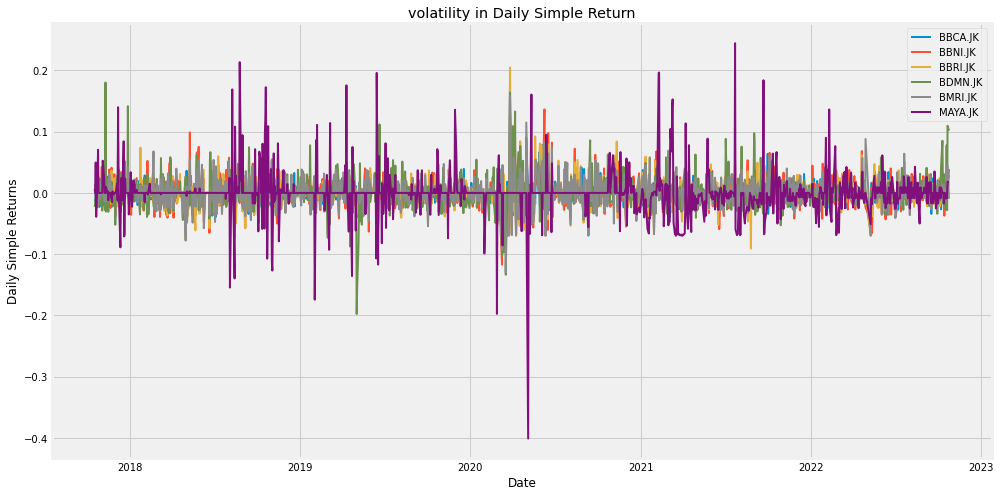

In [18]:
print('Daily Returns')
fig, ax=plt.subplots(figsize=(15,8))

for i in daily_return.columns.values :
    ax.plot(daily_return[i], lw =2 ,label = i)
    
ax.legend( loc='upper right', fontsize=10)
ax.set_title('volatility in Daily Simple Return')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Simple Returns')
plt.show(fig)

Based on the above graph, Bank Maya is the most volatile and followed by BBRI.The least volatile is either BBCA or BMRI. 

In [16]:
print('Average Daily returns(%) of stocks in our portfolio')
avg_daily=daily_return.mean()
print(avg_daily)

Average Daily returns(%) of stocks in our portfolio
BBCA.JK    0.000795
BBNI.JK    0.000520
BBRI.JK    0.000662
BDMN.JK    0.000242
BMRI.JK    0.000719
MAYA.JK   -0.000656
dtype: float64


Well, the number is quite low and it seems like Bank Maya is really risky, but we will analyse further.

#### Risk

Box Plot

<AxesSubplot:title={'center':'Risk Box Plot'}>

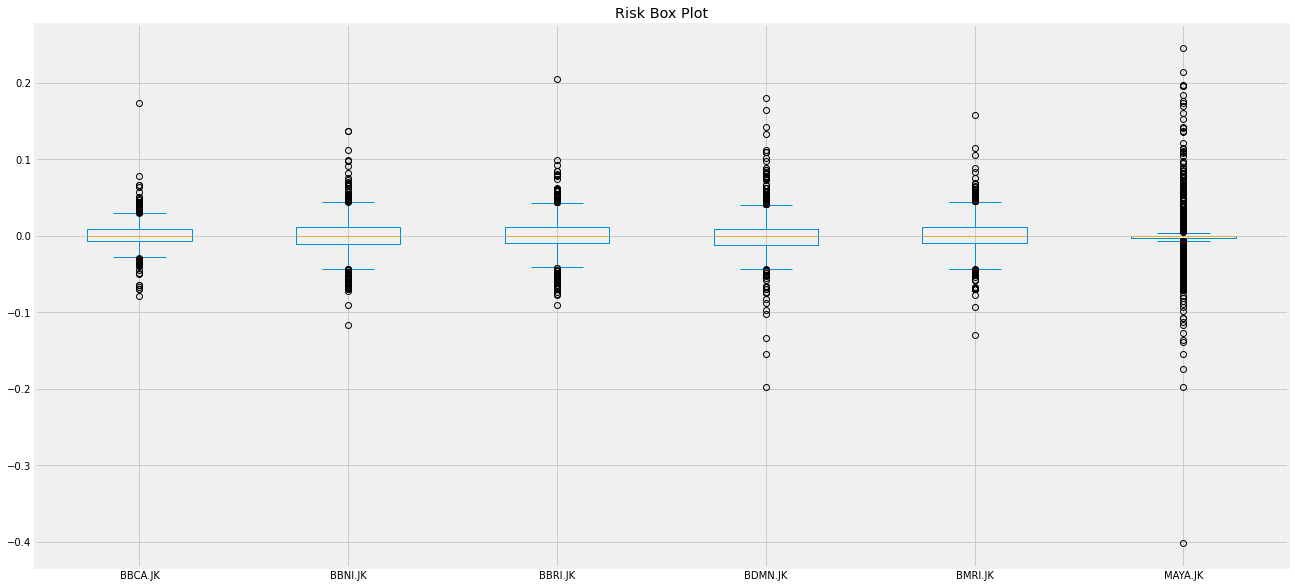

In [20]:
daily_return.plot(kind="box", figsize=(20,10), title="Risk Box Plot")

It is difficult to view the volatility on the previous graph. However, we can see it clearly now that BBCA is the least volatile followed by BMRI, while Bank Maya have a relatively unsual box plot and alot of outliers.

Next, we need to calculate the standard deviation to see the numerical comparison.

In [26]:
print('Annualized Standard Deviation (Volatility(%), 252 trading days) of stocks in portfolio')
print(daily_return.std()*np.sqrt(252)*100)

Annualized Standard Deviation (Volatility(%), 252 trading days) of stocks in portfolio
BBCA.JK    25.183325
BBNI.JK    36.443645
BBRI.JK    34.646504
BDMN.JK    40.464935
BMRI.JK    34.745173
MAYA.JK    55.559507
dtype: float64


It is actually BBRI on the second place after BBCA. BBCA is quite well-known and private owned bank, while BBRI, BMRI, and BBNI are partially state-owned banks.

#### Calculating RAR (Risk Adjusted Return)

RAR is calculated by dividing return with the risk. This implies for every 1% of risk, how many percent of return will we get.

In [31]:
avg_daily/(daily_return.std()*np.sqrt(252))*100

BBCA.JK    0.315635
BBNI.JK    0.142710
BBRI.JK    0.191155
BDMN.JK    0.059837
BMRI.JK    0.206928
MAYA.JK   -0.118138
dtype: float64

The higher the value of the RAR, the better it is. Thus, BBCA is the most preffered, followed by BMRI. 

### Cumulative Returns

In [33]:
daily_cummulative_return=(daily_return+1).cumprod()
daily_cummulative_return

,BBCA.JK,BBNI.JK,BBRI.JK,BDMN.JK,BMRI.JK,MAYA.JK
Date,,,,,,
2017-10-17,0.989144,1.003322,1.003257,0.977064,1.014440,1.005882
2017-10-18,0.974668,1.016611,1.003257,0.963303,1.021661,1.005882
2017-10-19,0.980700,1.019934,1.009772,0.958716,1.007220,1.055882
2017-10-20,0.981906,1.016611,1.017915,0.990826,1.025271,1.014706
2017-10-23,1.013269,1.003322,1.017915,0.967890,1.003610,1.044118
...,...,...,...,...,...,...
2022-10-18,2.168153,1.283772,1.630497,0.705465,1.696250,0.194003
2022-10-19,2.161622,1.298571,1.634298,0.760282,1.691786,0.192256
2022-10-20,2.220398,1.331867,1.668504,0.738832,1.767671,0.192256


Cummulative Returns


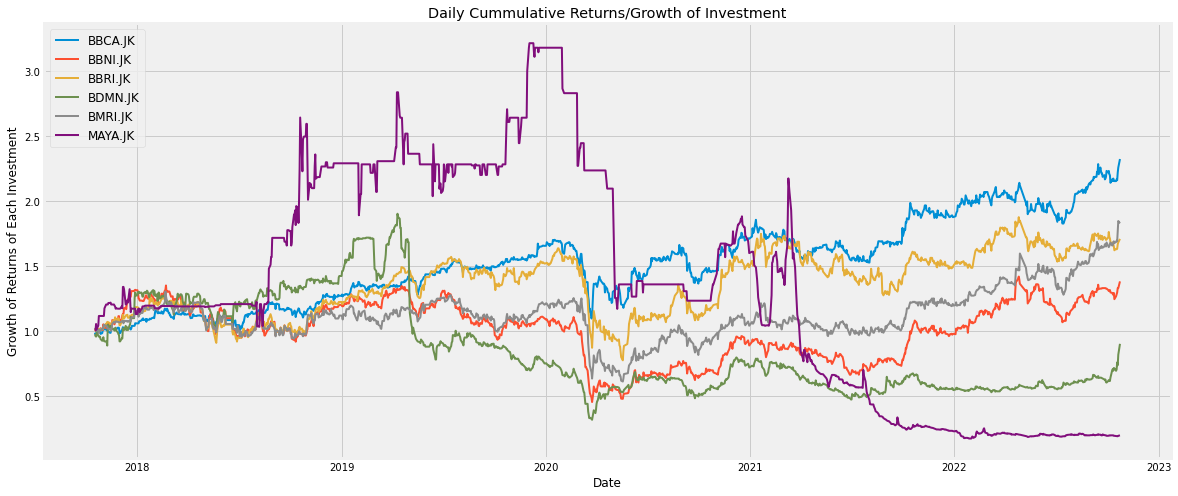

In [47]:
print('Cummulative Returns')
fig, ax=plt.subplots(figsize=(18,8))

for i in daily_cummulative_return.columns.values:
    ax.plot(daily_cummulative_return[i], lw=2, label=i)
    
ax.legend(loc='upper left', fontsize=12)
ax.set_title('Daily Cummulative Returns/Growth of Investment')
ax.set_xlabel('Date')
ax.set_ylabel('Growth of Returns of Each Investment')
plt.show(fig)

Based on the above graph, *BBCA* was the most consistent bank with gradual increase and for the last nearly two years, has the highest cummulative return. Either *BDMN* or BBRI followed after. *Bank Maya* experienced the largest drop. My humble speculation is because of the scandal that happened in 2020 involving Maya and Jiwasraya (insurance company). Now, the company's value is gradually decreasing.